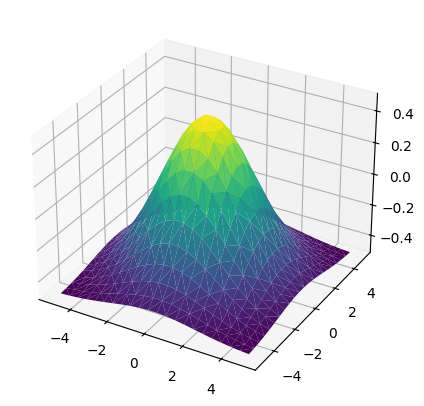

In [1]:
import matplotlib.pyplot as plt
from tools import generate_gaussian_data

X, y = generate_gaussian_data(500)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.T[0], X.T[1], y.T.ravel(), cmap='viridis')
plt.show()

### 1. Vary the number of nodes in the hidden layer from 1 to 25 (every few) and try to observe any trends. What happens when you have very few (less than 5) or very many (more than 20) hidden nodes? Can you explain your observations? Try to make a model comparison - what error estimates and how would you compare them to identify the ”best” model?

In [3]:
from tools import (
    ModelResult, load_MLP_regressor, split_dataset, evaluate
)

n_epochs = 100
model_results_1 = {}

for i in range(1, 26, 1): 
    model_results_1[i] = []
    print(f"\nTraining network with n_nodes = {i}")

    for j in range(5):
        model = load_MLP_regressor(n_nodes=i)

        X_train, X_val, y_train, y_val = split_dataset(X, y)
        model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)

        mse_train, mse_val, mse_overall = evaluate(
            model, X, y, X_train, X_val, y_train, y_val
        )
        print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \nMSE Overall: {mse_overall:.5f}")
        model_results_1[i].append(
            ModelResult(
                model=model,
                mse_train=mse_train, 
                mse_val=mse_val, 
                mse_overall=mse_overall
            )   
        )


Training network with n_nodes = 1
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0678 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0679 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0675 
MSE Train: 0.07101 
MSE Val: 0.06513 
MSE Overall: 0.06749
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0678 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0679 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0675 
MSE Train: 0.07101 
MSE Val: 0.06513 
MSE Overall: 0.06749
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0678 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0679 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0675 
MSE Train: 0.07100 
MSE Val: 0.06512 
MSE Overall: 0.06748
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0675 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0677 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0672 
MSE Train: 0.07077 
MSE Val: 0.06490 
MSE Overall: 0.06725
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1087 
10/10 ━━━━━━━━━━━━━━━━━━

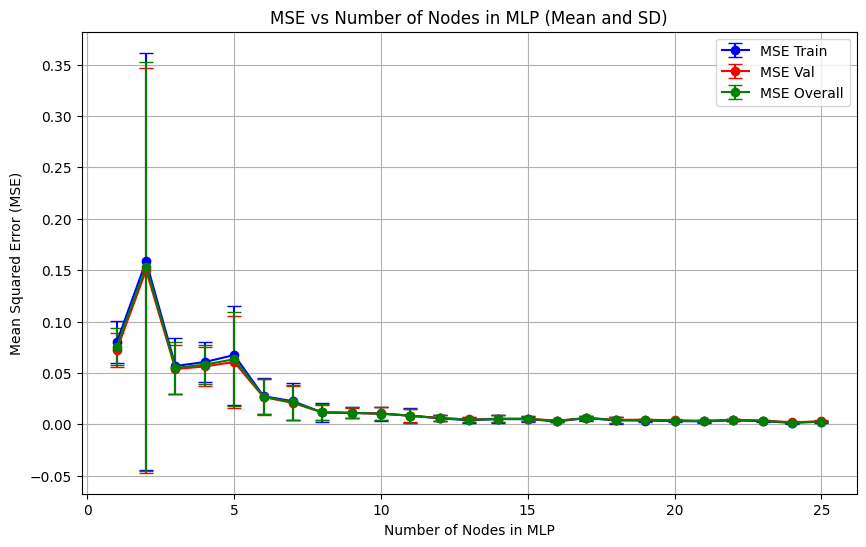

In [9]:
from tools import plot_mse_results
import statistics

nodes = list(range(1, 26, 1))
list_avg_mse_train = [statistics.mean([model_result.mse_train for model_result in model_results_1[i]]) for i in nodes]
list_avg_mse_val = [statistics.mean([model_result.mse_val for model_result in model_results_1[i]]) for i in nodes]
list_avg_mse_overall = [statistics.mean([model_result.mse_overall for model_result in model_results_1[i]]) for i in nodes]

list_stdev_mse_train = [statistics.stdev([model_result.mse_train for model_result in model_results_1[i]]) for i in nodes]
list_stdev_mse_val = [statistics.stdev([model_result.mse_val for model_result in model_results_1[i]]) for i in nodes]
list_stdev_mse_overall = [statistics.stdev([model_result.mse_overall for model_result in model_results_1[i]]) for i in nodes]

plot_mse_results(
    x_axis="nodes",
    x_axis_range=nodes,
    list_avg_mse_train=list_avg_mse_train,
    list_avg_mse_val=list_avg_mse_val,
    list_avg_mse_overall=list_avg_mse_overall,
    list_stdev_mse_train=list_stdev_mse_train,
    list_stdev_mse_val=list_stdev_mse_val,
    list_stdev_mse_overall=list_stdev_mse_overall
)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


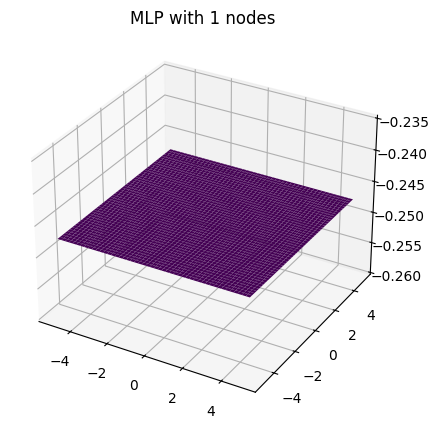

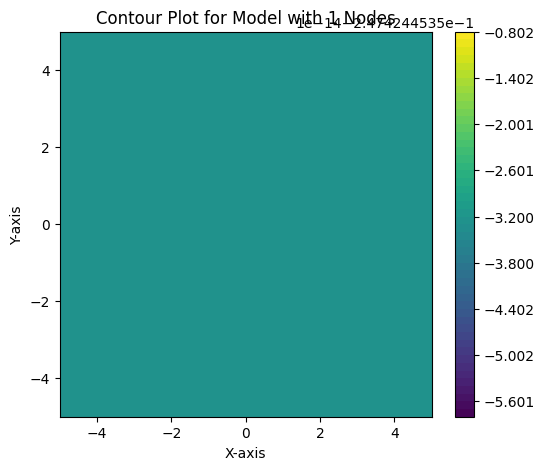

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step


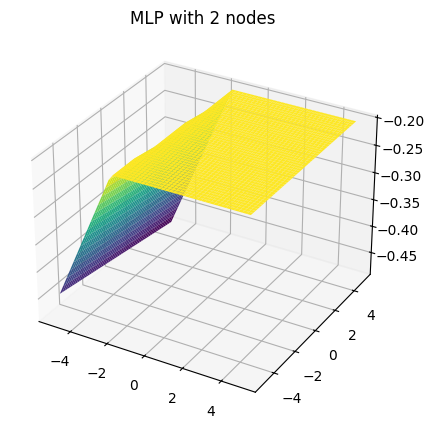

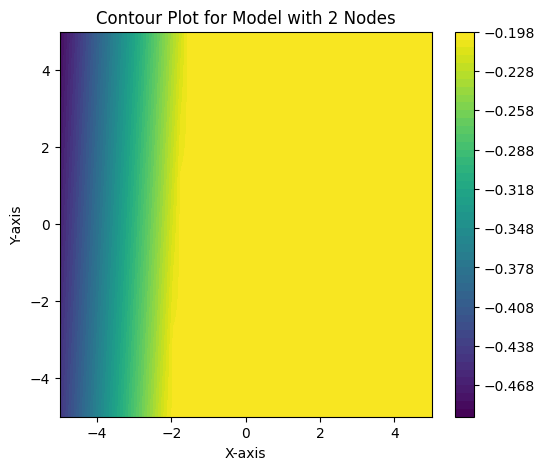

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step


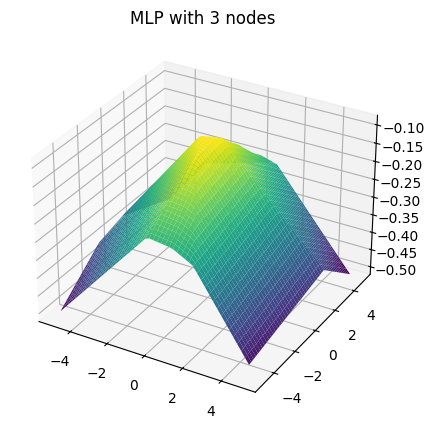

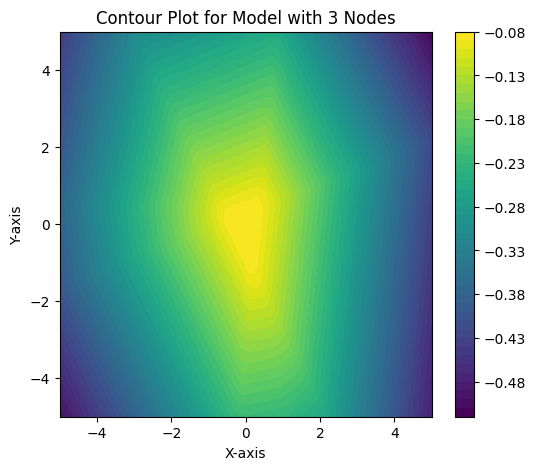

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


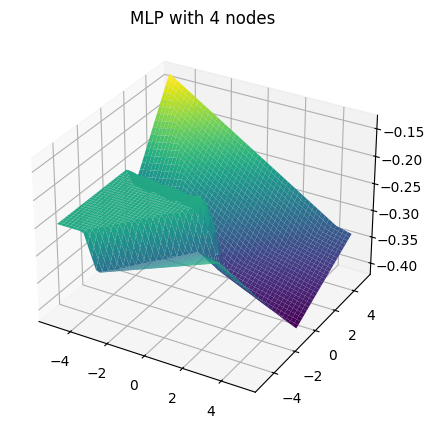

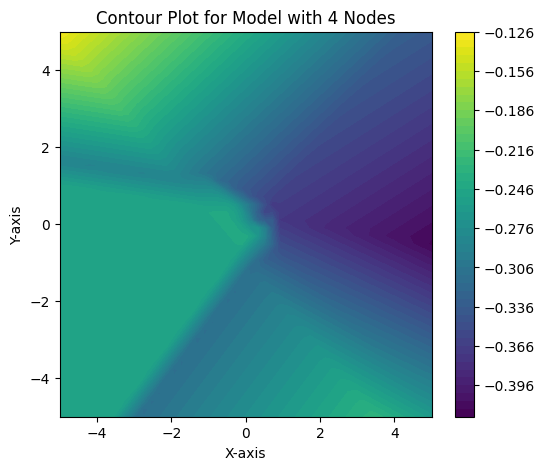

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step


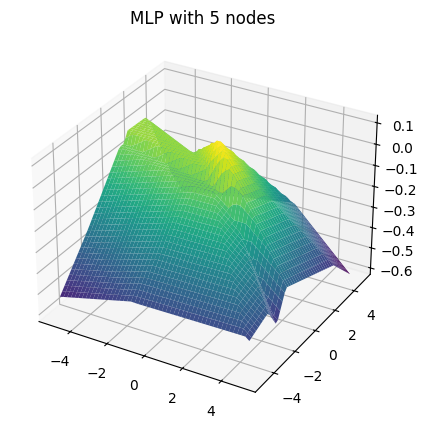

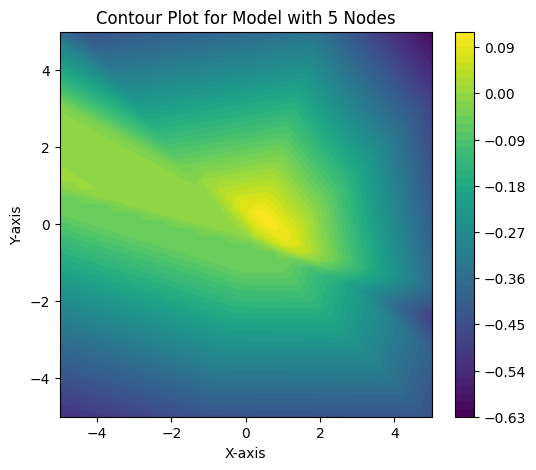

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


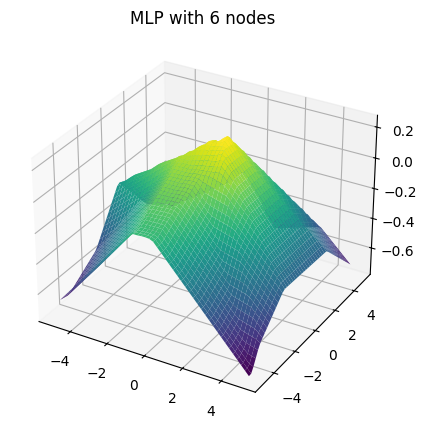

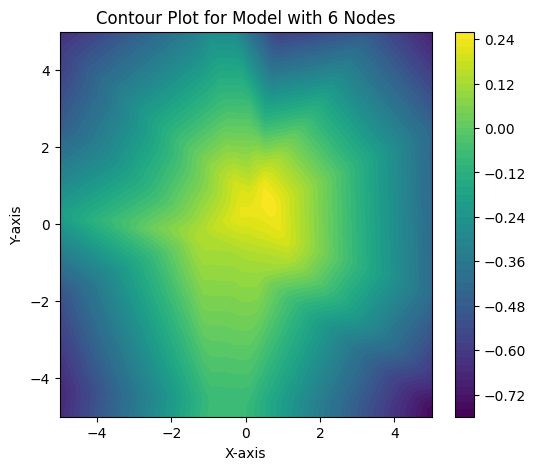

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


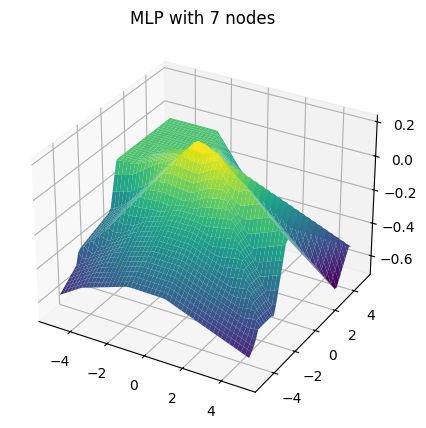

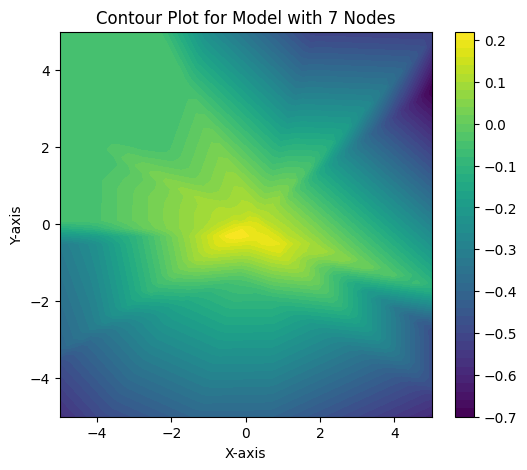

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


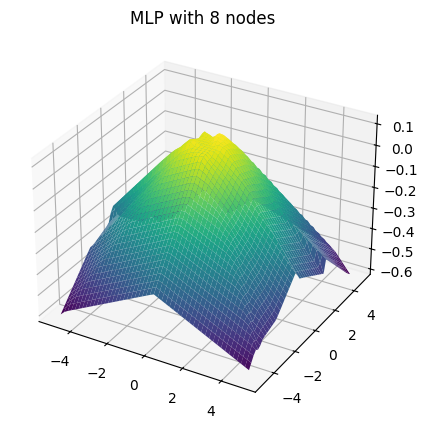

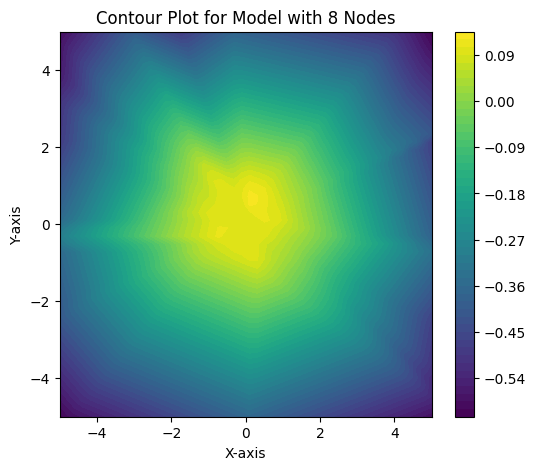

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


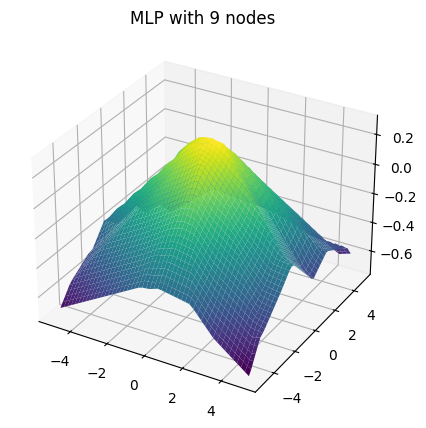

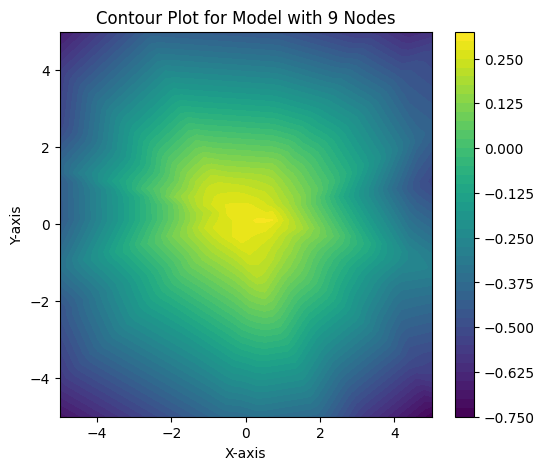

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


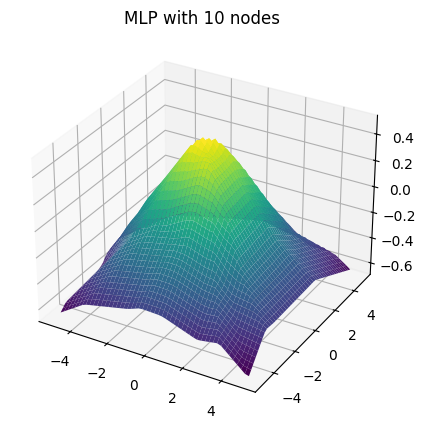

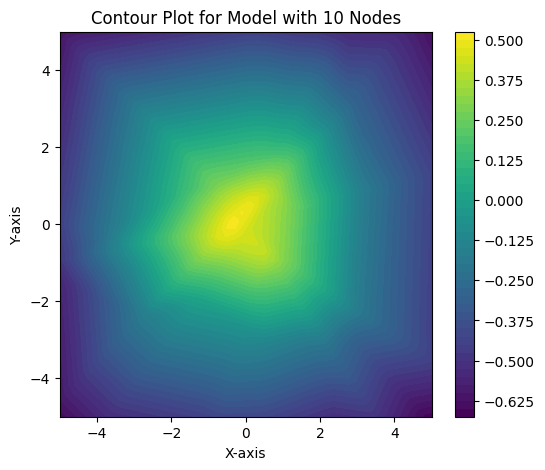

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


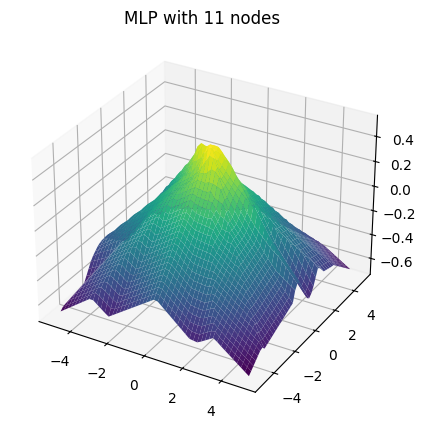

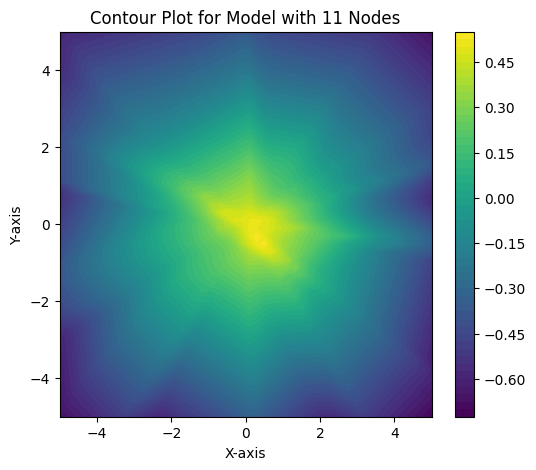

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


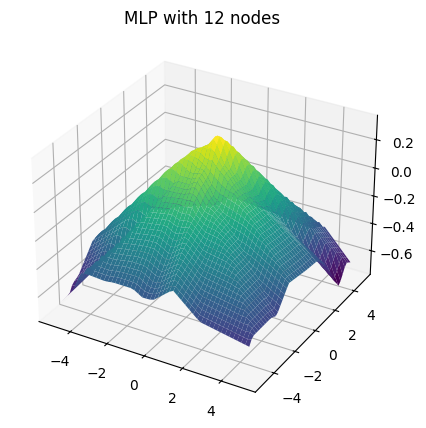

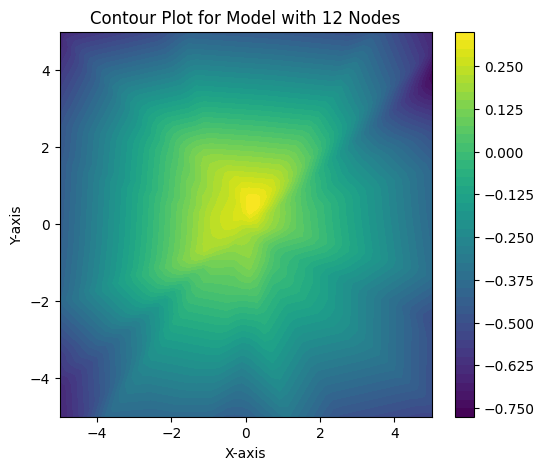

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step


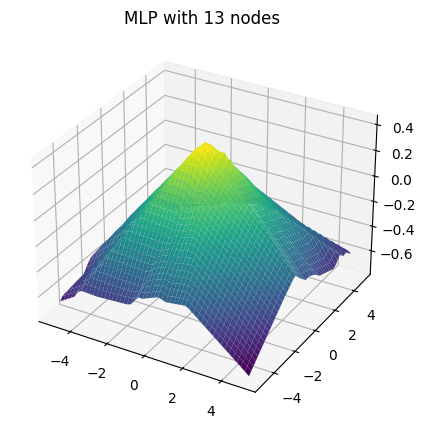

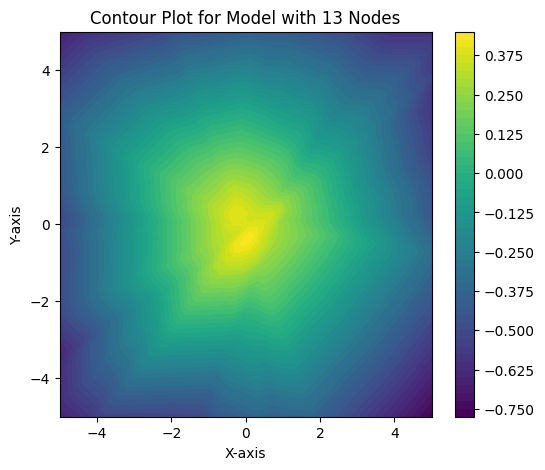

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


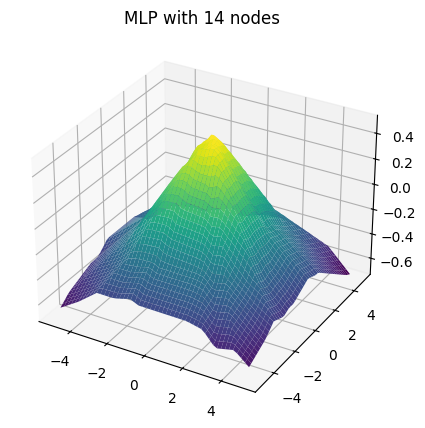

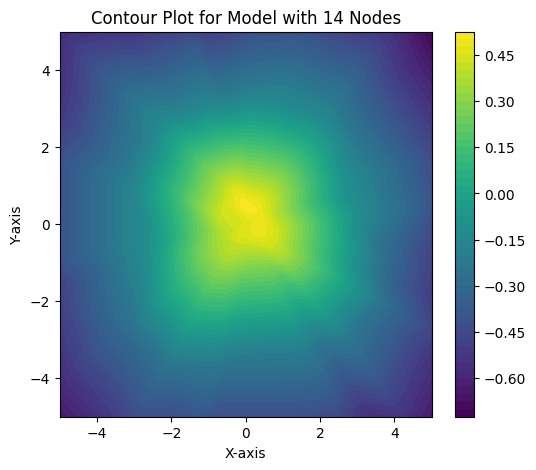

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


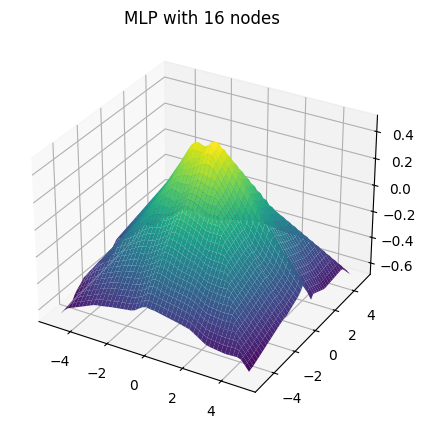

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


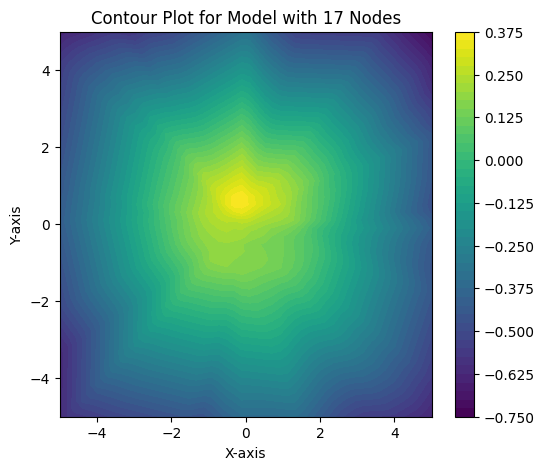

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


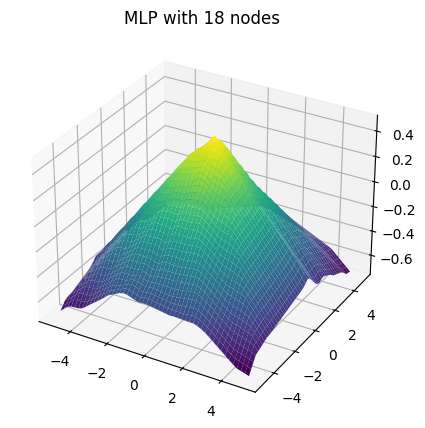

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step


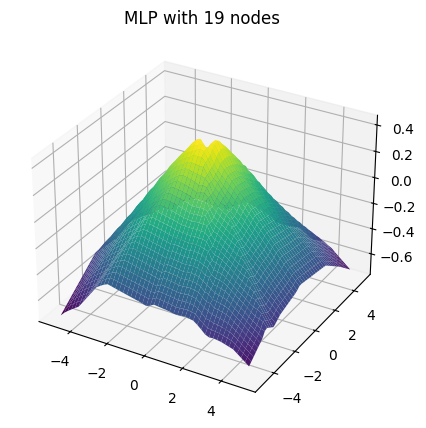

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


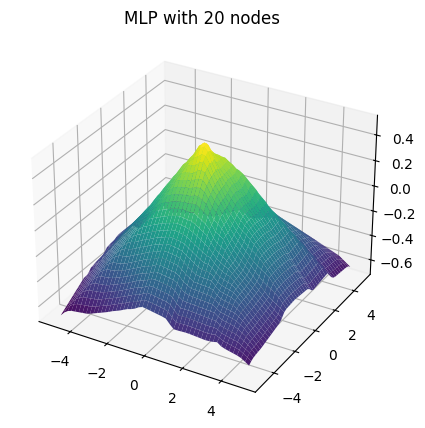

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step


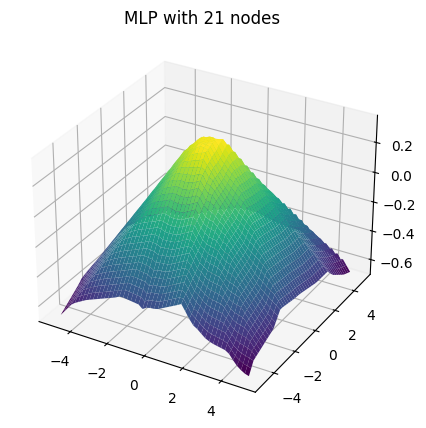

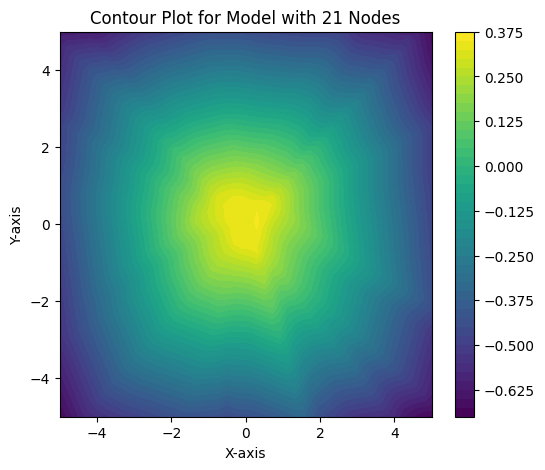

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


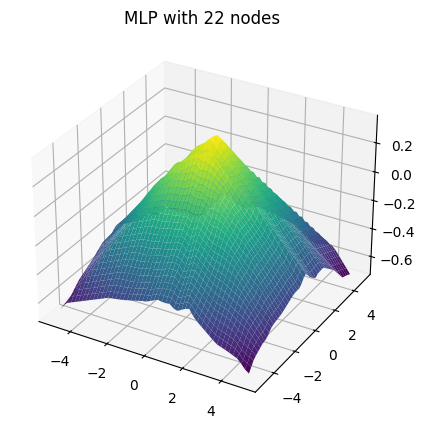

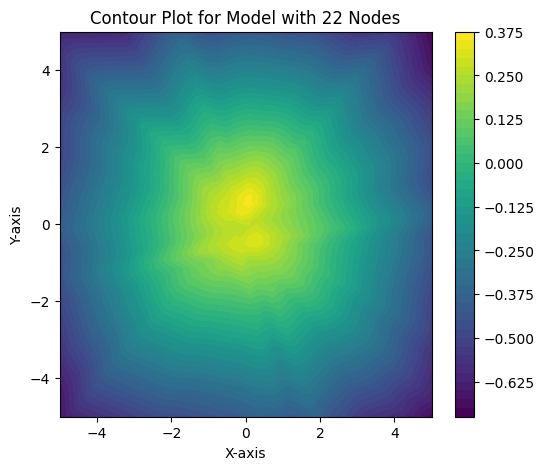

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step


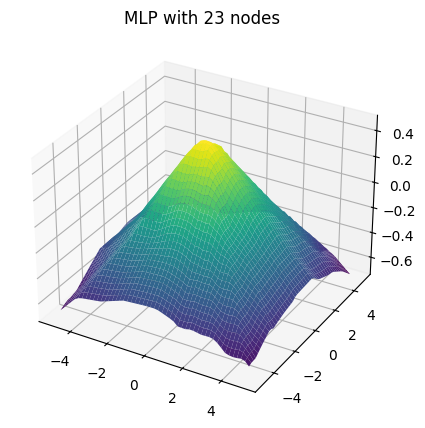

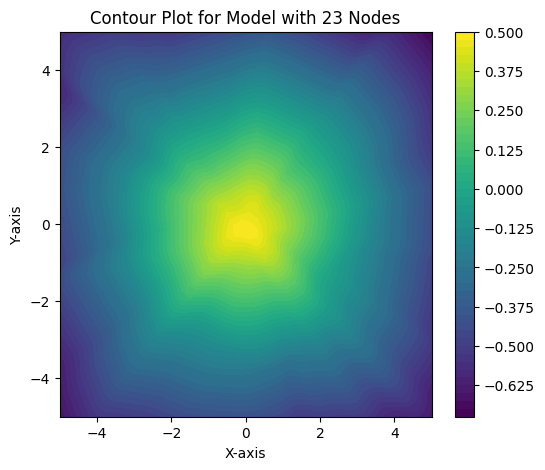

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step


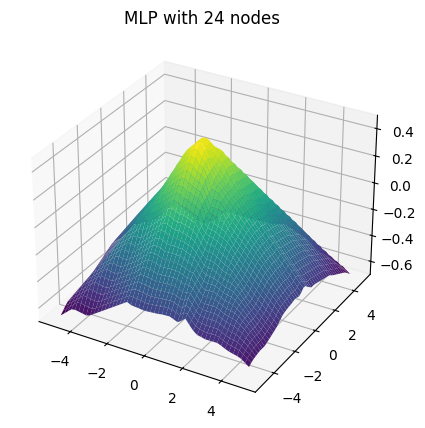

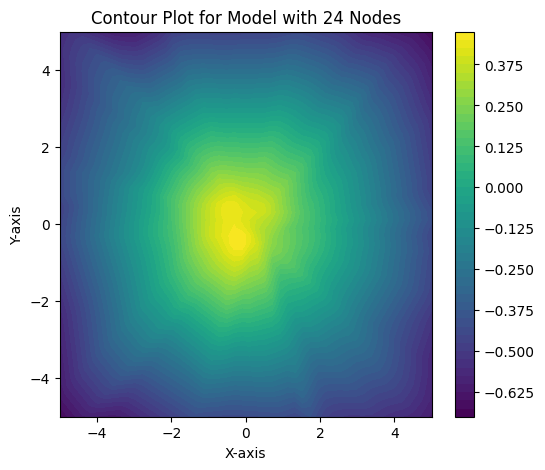

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


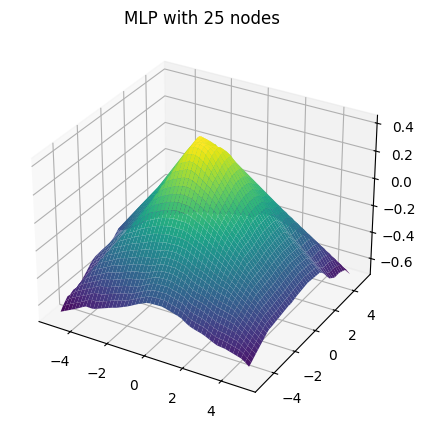

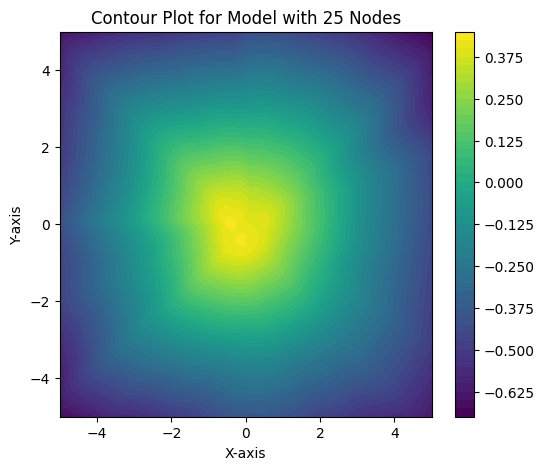

In [5]:
import numpy as np
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
y_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

for i in range(1, 26, 1):
    model = model_results_1[i][0].model
    Z = model.predict(grid_points).reshape(X_grid.shape)
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis')
    ax.set_title(f"MLP with {i} nodes")
    plt.savefig(f"imgs/split2_MLP_{i}_nodes")
    plt.show()

    fig, ax = plt.subplots(figsize=(6, 5))
    contour = ax.contourf(X_grid, Y_grid, Z, cmap='viridis', levels=50)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title(f"Contour Plot for Model with {i} Nodes")
    plt.savefig(f"imgs/split2_MLP_contour_{i}_nodes")
    plt.show()


### 2. For the selected ”best” model, run experiments with varying number of the training samples, e.g. from 80% down to 20% of all the dataset.

We choose the model with 8 nodes for the following reasons: 
1. Based on the elbow method, between 5 to 10 nodes seems like an optimal choice that balances between overfitting and underfitting. 
2. 8 nodes is chosen because there is a low distance between the training and validation MSE, indicating a well-balanced model.

In [10]:
model_results_2 = {}

for i in range(20, 81, 10): 
    training_fraction = i / 100
    model_results_2[i] = []
    print(f"Training network with n_nodes = {i} and training fraction: {training_fraction}")

    for j in range(10):
        model = load_MLP_regressor(n_nodes=8)

        X_train, X_val, y_train, y_val = split_dataset(X, y, use_seed=False)
        model.fit(X_train, y_train, epochs=n_epochs, verbose=0)

        mse_train, mse_val, mse_overall = evaluate(
            model, X, y, X_train, X_val, y_train, y_val
        )
        print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \nMSE Overall: {mse_overall:.5f}")
        model_results_2[i].append(
            ModelResult(
                model=model,
                mse_train=mse_train, 
                mse_val=mse_val, 
                mse_overall=mse_overall
            )
        )

Training network with n_nodes = 20 and training fraction: 0.2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0133 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 
MSE Train: 0.01241 
MSE Val: 0.01266 
MSE Overall: 0.01256
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 
MSE Train: 0.01368 
MSE Val: 0.01299 
MSE Overall: 0.01327
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0236 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0228 
MSE Train: 0.02165 
MSE Val: 0.02157 
MSE Overall: 0.02160
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 
MSE Train: 0.01023 
MSE Val: 0.00897 
MSE Overall: 0.00947
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.007

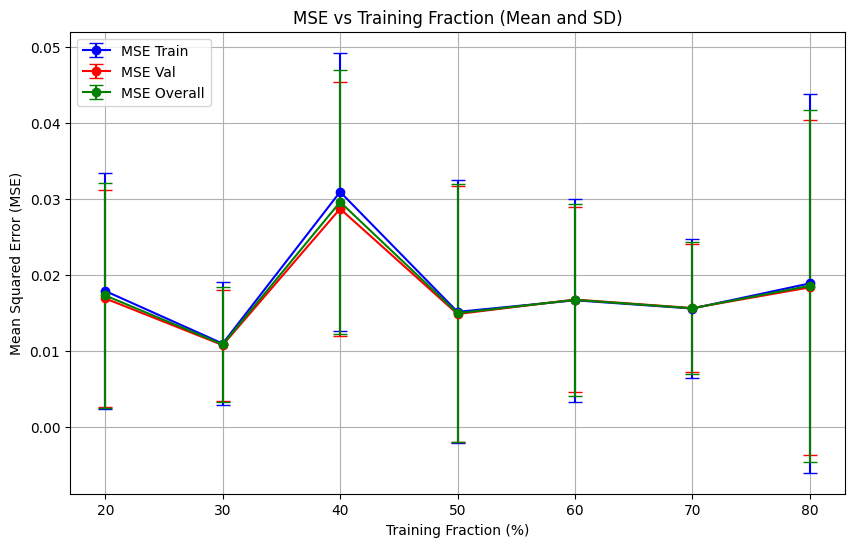

In [11]:
training_fractions = list(range(20, 81, 10))
list_avg_mse_train = [statistics.mean([model_result.mse_train for model_result in model_results_2[i]]) for i in training_fractions]
list_avg_mse_val = [statistics.mean([model_result.mse_val for model_result in model_results_2[i]]) for i in training_fractions]
list_avg_mse_overall = [statistics.mean([model_result.mse_overall for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_train = [statistics.stdev([model_result.mse_train for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_val = [statistics.stdev([model_result.mse_val for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_overall = [statistics.stdev([model_result.mse_overall for model_result in model_results_2[i]]) for i in training_fractions]

plot_mse_results(
    x_axis="training_fraction",
    x_axis_range=training_fractions,
    list_avg_mse_train=list_avg_mse_train,
    list_avg_mse_val=list_avg_mse_val,
    list_avg_mse_overall=list_avg_mse_overall,
    list_stdev_mse_train=list_stdev_mse_train,
    list_stdev_mse_val=list_stdev_mse_val,
    list_stdev_mse_overall=list_stdev_mse_overall
)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


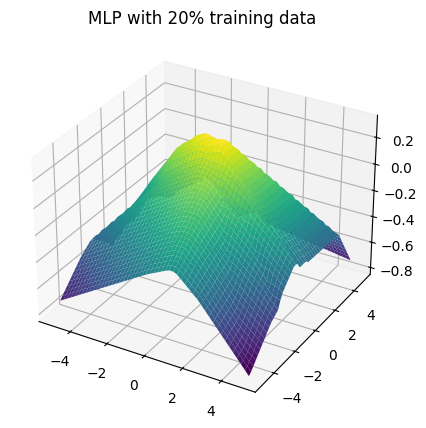

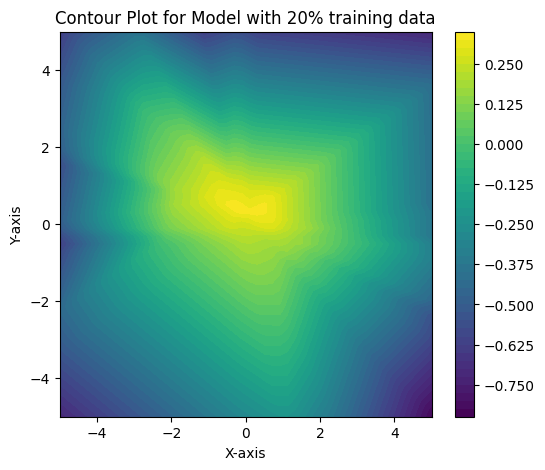

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


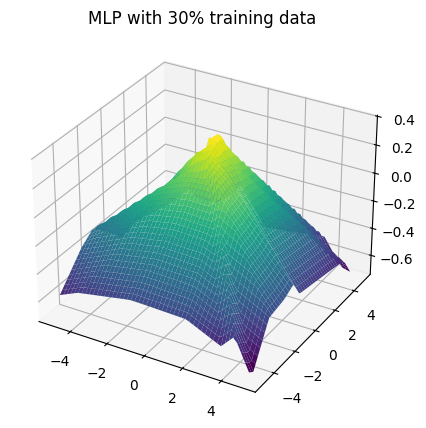

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


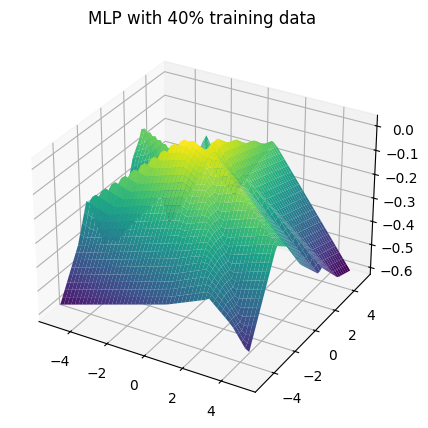

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


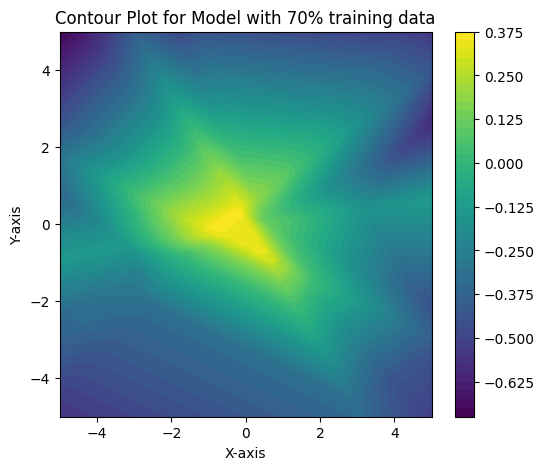

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step


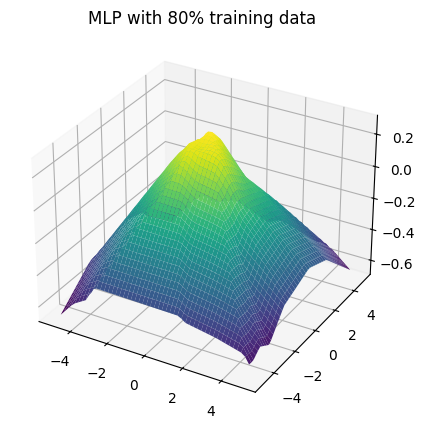

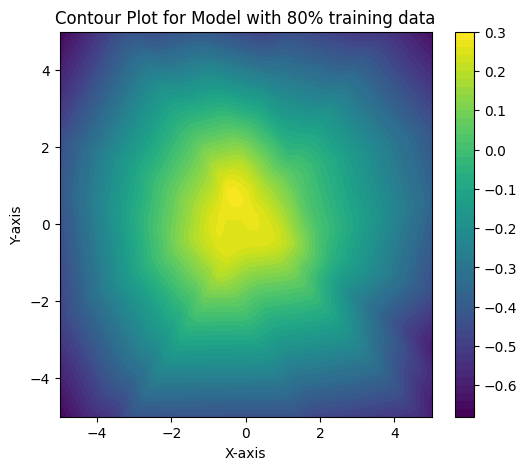

In [12]:
x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 50)
y_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 50)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

for i in range(20, 81, 10):
    model = model_results_2[i][0].model
    Z = model.predict(grid_points).reshape(X_grid.shape)
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis')
    ax.set_title(f"MLP with {i}% training data")
    plt.savefig(f"imgs/split2_MLP_{i}_training_data")
    plt.show()

    fig, ax = plt.subplots(figsize=(6, 5))
    contour = ax.contourf(X_grid, Y_grid, Z, cmap='viridis', levels=50)
    plt.colorbar(contour, ax=ax)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_title(f"Contour Plot for Model with {i}% training data")
    plt.savefig(f"imgs/split2_MLP_contour_{i}_training_data")
    plt.show()


### 3. For the ”best” model, can you speed up the convergence without compromising the generalisation performance?

Some ways to speed up the convergence (without compromising generalisation) are: 
1. Reducing the batch size, thereby getting the batch gradient descent to be more like stochastic gradient descent in practice. 
2. Reducing the number of epochs to a certain extent (early stopping).
3. Use an adaptive learning rate such as Adam (which we have already used) instead of a fixed learning rate. 
4. Use a better weight initialization strategy, such as using he_normal.

In [13]:
model = load_MLP_regressor(n_nodes=8)

X_train, X_val, y_train, y_val = split_dataset(X, y)
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200


c:\SUTD\KTH\DD2437 Artificial Neural Networks and Deep Architectures\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5148 - val_loss: 0.4060
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4117 - val_loss: 0.3330
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3335 - val_loss: 0.2745
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2726 - val_loss: 0.2287
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2260 - val_loss: 0.1923
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1904 - val_loss: 0.1636
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1631 - val_loss: 0.1406
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1418 - val_loss: 0.1217
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1250 - val_loss: 0.1064
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1114 - val_loss: 0.0938
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1003 - val_loss: 0.0834
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0911 - val_loss: 0.0750
Ep

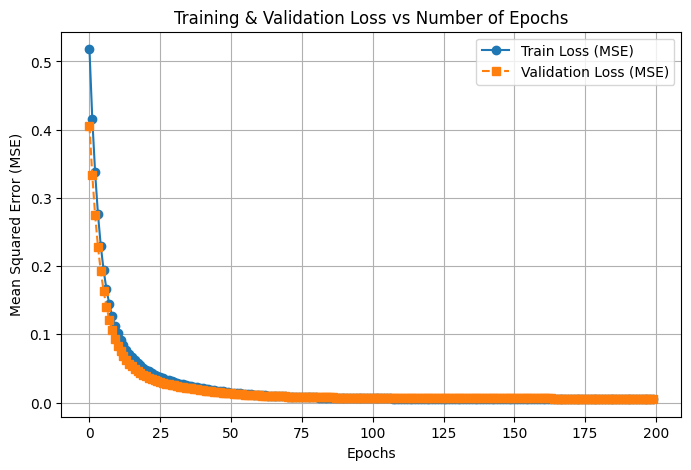

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training & Validation Loss vs Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()
